# Assignment 3

The assignment 3 contains 1 question and the due date is May 16th (Tuesday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 Cat people or dog people? (100 points)

The whole cats versus dogs saga has been going on forever. It's an age-old debate, a tale as old as time, a common icebreaker on first meeting. "Are you a cat person or a dog person?"


The terms dog people and cat people refer to a person's domesticated pet animal preference. Through research completed at research institutions, it was found that there were differences in character and behaviour between dog and cat people. It was also found that some people base a significant portion of their identity around their affinity for either cats or dogs. This builds on the perceived dichotomy between cats and dogs as pets in society. A new survey says that your pet preference may actually say a lot about your personality and your lifestyle, down to your favorite exercises and your annual income.

![cat_dog](https://assets.smoothradio.com/2017/42/dog-person-cat-person-quiz-1508430737-list-handheld-0.jpg)


In this question, you will be asked to make classifications between cat and dog images. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's first load the `cats_vs_dogs` dataset from [tensorflow dataset ](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs):

In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [5]:
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/Users/rodrigosimoes/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howel

In [6]:
import io
from PIL import Image

def is_valid_jpeg(image_data):
    try:
        Image.open(io.BytesIO(image_data)).verify()
    except (IOError, SyntaxError):
        return False
    return True

def preprocess(image, label):
    def wrapped_is_valid_jpeg(image):
        valid = is_valid_jpeg(tf.image.encode_jpeg(image).numpy())
        return tf.constant(valid, dtype=tf.bool)

    valid = tf.py_function(wrapped_is_valid_jpeg, [image], tf.bool)
    
    image = tf.cond(valid,
                    lambda: tf.image.resize(image, [224, 224]),
                    lambda: tf.zeros([224, 224, 3], dtype=tf.float32))
    
    image = tf.cast(image, tf.float32) / 255.0
    return image, label





ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

We visualize some random images from the dataset below:

(32, 224, 224, 3)


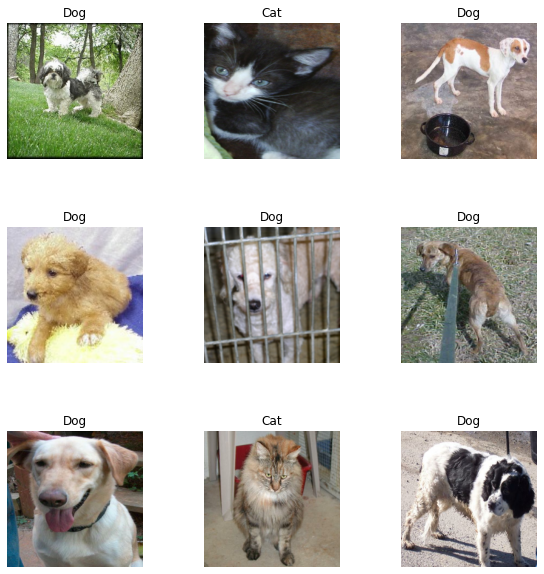

In [7]:
import matplotlib.pyplot as plt

def visualize_images(ds_train, num_images=9):
    ds_train_iter = iter(ds_train)
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    batch_images, batch_labels = next(ds_train_iter)
    print(batch_images.shape)
    for i in range(num_images):
        image = batch_images[i].numpy()
        image = np.squeeze(image)
        label = batch_labels[i].numpy()
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title('Dog' if label else 'Cat', fontsize=12)

    plt.subplots_adjust(hspace=0.5)
    plt.show()

visualize_images(ds_train)


### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the cats_vs_dogs image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Donot forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

In [9]:
# Solution

A network with 20 hidden layers and 100 neurons per layer is likely to overfit on this dataset, leading to the capture of noise and outliers in the data. 

In [10]:
# Start building a Sequential model
model = keras.models.Sequential()

# Add an input layer that flattens the input image to a 1D array
model.add(keras.layers.Flatten(input_shape=[224, 224, 3]))

# Add 20 hidden layers, each with 100 neurons and ReLU activation function
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))

# Add an output layer with one neuron (for binary classification) and sigmoid activation
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy as a metric
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Train the model on the training data for 100 epochs, using the test set as validation data
history = model.fit(ds_train, epochs=100, validation_data=ds_test)


Epoch 1/100
582/582 [==============================] - 145s 242ms/step - loss: 0.6936 - accuracy: 0.5044 - val_loss: 0.6928 - val_accuracy: 0.4901
Epoch 2/100
582/582 [==============================] - 141s 243ms/step - loss: 0.6933 - accuracy: 0.4998 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 3/100
582/582 [==============================] - 146s 250ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 4/100
582/582 [==============================] - 143s 245ms/step - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6935 - val_accuracy: 0.4901
Epoch 5/100
582/582 [==============================] - 153s 262ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4901
Epoch 6/100
582/582 [==============================] - 149s 255ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 7/100
582/582 [==============================] - 133s 228ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0

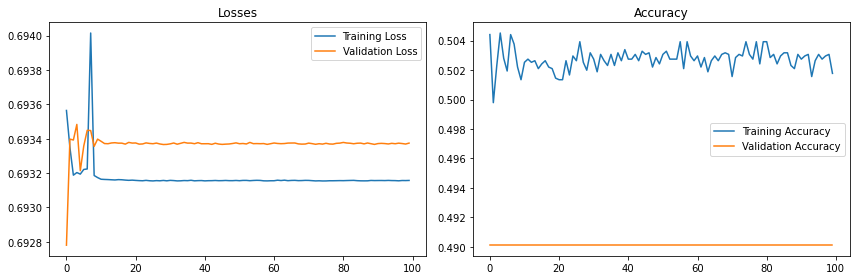

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Losses')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


The model's training accuracy quickly reaches high values while the validation accuracy remains relatively low. This is a clear sign of overfitting. The model is essentially memorizing the training data and fails to generalize well to unseen data in the validation set.

The training loss also decreases quickly, while the validation loss decreases initially but then starts to increase, which is another sign of overfitting.

In [12]:
# Check the number of parameters in each layer and the total number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

### Question 1.2 (35 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture. 

In [12]:
# Solution

#### Add Weight Regularization
Weight regularization is a technique that prevents the weights from becoming too large by adding an additional cost to the loss function of the network. It reduces overfitting by making the model simpler. We'll use L2 regularization as an example:

In [8]:
from tensorflow.keras import regularizers

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[224, 224, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu", 
                                 kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history = model.fit(ds_train, epochs=100, validation_data=ds_test)

Epoch 1/100
582/582 [==============================] - 167s 282ms/step - loss: 0.8800 - accuracy: 0.4994 - val_loss: 0.6935 - val_accuracy: 0.4901
Epoch 2/100
582/582 [==============================] - 138s 237ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 3/100
582/582 [==============================] - 136s 233ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 4/100
582/582 [==============================] - 135s 233ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 5/100
582/582 [==============================] - 136s 233ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 6/100
582/582 [==============================] - 136s 233ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 7/100
582/582 [==============================] - 134s 229ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0

#### Add Dropout
Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

In [9]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape=[224, 224, 3]))
for _ in range(20):
    model_2.add(keras.layers.Dense(100, activation="relu", 
                                 kernel_regularizer=regularizers.l2(0.001)))
    model_2.add(keras.layers.Dropout(0.5))  # Dropout layer
model_2.add(keras.layers.Dense(1, activation="sigmoid"))

model_2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history_2 = model_2.fit(ds_train, epochs=100, validation_data=ds_test)

Epoch 1/100
582/582 [==============================] - 140s 234ms/step - loss: 3.6139 - accuracy: 0.5015 - val_loss: 2.5744 - val_accuracy: 0.4901
Epoch 2/100
582/582 [==============================] - 134s 230ms/step - loss: 2.4759 - accuracy: 0.5020 - val_loss: 2.3987 - val_accuracy: 0.4901
Epoch 3/100
582/582 [==============================] - 134s 230ms/step - loss: 2.3391 - accuracy: 0.5043 - val_loss: 2.2814 - val_accuracy: 0.4901
Epoch 4/100
582/582 [==============================] - 134s 229ms/step - loss: 2.2259 - accuracy: 0.5019 - val_loss: 2.1595 - val_accuracy: 0.4901
Epoch 5/100
582/582 [==============================] - 135s 231ms/step - loss: 2.0925 - accuracy: 0.5004 - val_loss: 2.0226 - val_accuracy: 0.4901
Epoch 6/100
582/582 [==============================] - 134s 229ms/step - loss: 1.9494 - accuracy: 0.4999 - val_loss: 1.8723 - val_accuracy: 0.4901
Epoch 7/100
582/582 [==============================] - 137s 234ms/step - loss: 1.7929 - accuracy: 0.5013 - val_loss: 1

#### Add Batch Normalization
Batch normalization is a technique that can make deep networks faster to train. It normalizes the activations of the neurons in the network.

In [ ]:
model_3 = keras.models.Sequential()
model_3.add(keras.layers.Flatten(input_shape=[224, 224, 3]))
for _ in range(20):
    model_3.add(keras.layers.Dense(100, kernel_regularizer=regularizers.l2(0.001)))
    model_3.add(keras.layers.BatchNormalization())  # Batch normalization layer
    model_3.add(keras.layers.Activation('relu'))  # Relu activation after batch normalization
    model_3.add(keras.layers.Dropout(0.5))
model_3.add(keras.layers.Dense(1, activation="sigmoid"))

model_3.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history_3 = model_3.fit(ds_train, epochs=100, validation_data=ds_test)

Epoch 1/100
582/582 [==============================] - 152s 245ms/step - loss: 3.1543 - accuracy: 0.5070 - val_loss: 2.8223 - val_accuracy: 0.5099
Epoch 2/100
582/582 [==============================] - 136s 234ms/step - loss: 2.5934 - accuracy: 0.5077 - val_loss: 2.3799 - val_accuracy: 0.5099
Epoch 3/100
582/582 [==============================] - 134s 230ms/step - loss: 2.1903 - accuracy: 0.5041 - val_loss: 2.0102 - val_accuracy: 0.5099
Epoch 4/100
582/582 [==============================] - 134s 231ms/step - loss: 1.8496 - accuracy: 0.5089 - val_loss: 1.7516 - val_accuracy: 0.5099
Epoch 5/100
582/582 [==============================] - 134s 231ms/step - loss: 1.5816 - accuracy: 0.5130 - val_loss: 1.4753 - val_accuracy: 0.5099
Epoch 6/100
582/582 [==============================] - 134s 231ms/step - loss: 1.3642 - accuracy: 0.5206 - val_loss: 1.2858 - val_accuracy: 0.5099
Epoch 7/100
582/582 [==============================] - 137s 235ms/step - loss: 1.1863 - accuracy: 0.5166 - val_loss: 1

#### Add Early Stopping
Early stopping is a technique where we stop training the model when the validation error starts to increase (i.e., validation loss starts to increase), preventing overfitting.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(ds_train, epochs=100, validation_data=ds_test,
                    callbacks=[early_stopping_cb])  # Add callback to the fit method

### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network. 

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron.

### Question 1.4 Transfer learning (20 points)

In this question, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below: 

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures. 

### Question 1.5 Model Inference (5 points)

Now let's try to use the best model you trained from the preivous steps to make the predictions on dog and cat images. If you have not heared about generative AI, now it is time to try. Go to stable diffusion online (https://stablediffusionweb.com/) and try to generate some images. 

Go to stable diffusion playground, and enter prompt as text input and click the generate images. Your prompt should contain the word of 'cat' and 'dog' and with at least 10 words (e.g. `a cat lying on the bench and sleeping on the Mars `). Each time you should be able to generate 4 images. Get 4 dog images and 4 cat images repectively and use the trained model to make the prediction, show your accuracy.

